# Data Science 220 Final Project
*Jacob Seymour*

For this project, I wanted to look into F1 data as the sport is something I am personally interested in, and I know that data is a very large part of the sport and its progression. I was able to find a dataset on kaggle that held data from the 1950-2024 Formula 1 World Championships. (https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020?resource=download) I personally went into the csv files and trimmed the data to just the years that are necessary in the specific files that I will be referencing. With this project, I hope to try and guage how the average performance of the Formula 1 Grid has evolved over the 3 full seasons of the current regulation set (2022-2024). I also want to see what the average delta is between the top car and bottom car at the start and end of each season, as well as track how this evolves over the three seasons. Lastly, I want to compare how well the top 5 teams (Mclaren, Ferrari, Red Bull, Mercedes, and Aston Martin) are able to develop their cars year over year and from the start to finish each year.

## Importing the Python Libraries, Data, and the Functions to be Used Throughout The Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
cd C:\Users\jseym\iCloudDrive\Spring 25\DS220 Final Project\Data

C:\Users\jseym\iCloudDrive\Spring 25\DS220 Final Project\Data


C:\Users\jseym\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


**Importing and Describing the Data**

In [3]:
qualifying_results = pd.read_csv('qualifying.csv')

In [4]:
qualifying_results

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,9176,1074,844,6,16,1,1:31.471,1:30.932,1:30.558
1,9177,1074,830,9,1,2,1:31.785,1:30.757,1:30.681
2,9178,1074,832,6,55,3,1:31.567,1:30.787,1:30.687
3,9179,1074,815,9,11,4,1:32.311,1:31.008,1:30.921
4,9180,1074,1,131,44,5,1:32.285,1:31.048,1:31.238
...,...,...,...,...,...,...,...,...,...
1354,10547,1144,848,3,23,16,1:23.821,\N,\N
1355,10548,1144,855,15,24,17,1:23.880,\N,\N
1356,10549,1144,1,131,44,18,1:23.887,\N,\N
1357,10550,1144,861,3,43,19,1:23.912,\N,\N


This particular set of data contains the qualifying results from every race in the 2022-2024 Formula 1 Season. This is where all of the lap times will come from to be able to track the development of the cars year over year. We will use the q1 lap times to find the overall gap in laptime, at specific tracks as well as across an entire season, across the entire grid and then the q3 laptimes to track each of Mclaren's, Ferrari's, Redbull's, Aston Martin's, and Mercedes's fastest laps to determine how each team is able to develop their car. To track the constructor laptimes, the constructor ids and race ids can be found in a different file (constructors.csv and races.csv) which tell me what they correspond to, but do not need to be imported into a dataframe. The ids will be referenced throughout the code, and will be labeled with that they correspond to such that it is easy to follow.

## Data Computation

### Slowest vs. Fastest Laps (Gap between the slowest and fasest cars on the grid)

In [5]:
def laptimeToSeconds(laptime):
    if laptime == '\\N':
        return None
    try:
        minutes, rest = laptime.split(":")
        seconds, milliseconds = rest.split(".")
        return int(minutes)*60 + int(seconds) + int(milliseconds)/1000
    except:
        return None

This function converts a given laptime string into a float value in seconds. The input is expected to be minutes:seconds:milliseconds but makes sure invalid times are filtered out

In [6]:
def findDelta(laptimes):
    for i in range(len(laptimes)):
        laptimes[i] = laptimeToSeconds(laptimes[i])
    laptimes.sort()
    delta = round(laptimes[-1] / laptimes[0] * 100, 1)
    return delta

This function takes the list of laptimes and computes the delta between the slowest and fastest laptimes in a percentage.

Above is a function that computes the delta between the fastest and slowest laps for q1 in each race

#### Bahrain Grand Prix Slowest vs. Fastest Laps

In [7]:
BahrainQ12022 = qualifying_results[qualifying_results['raceId'] == 1074]
BahrainQ12022 = BahrainQ12022['q1'].tolist()
BahrainQ12022Delta = findDelta(BahrainQ12022)
BahrainQ12022Delta

102.4

In [8]:
BahrainQ12023 = qualifying_results[qualifying_results['raceId'] == 1098]
BahrainQ12023 = BahrainQ12023['q1'].tolist()
BahrainQ12023Delta = findDelta(BahrainQ12023)
BahrainQ12023Delta

101.3

In [9]:
BahrainQ12024 = qualifying_results[qualifying_results['raceId'] == 1121]
BahrainQ12024 = BahrainQ12024['q1'].tolist()
BahrainQ12024Delta = findDelta(BahrainQ12024)
BahrainQ12024Delta

101.2

2022 - Slowest laptime was 102.4% of the fastest laptime  
2023 - Slowest laptime was 101.3% of the fastest laptime  
2024 - Slowest laptime was 101.2% of the fastest laptime

#### Singapore Grand Prix Slowest vs. Fastest Laps

In [10]:
SingaporeQ12022 = qualifying_results[qualifying_results['raceId'] == 1091]
SingaporeQ12022 = SingaporeQ12022['q1'].tolist()
SingaporeQ12022Delta = findDelta(SingaporeQ12022)
SingaporeQ12022Delta

104.0

The data for Singapore 2022 appears to be an outlier as the laptimes themselves are 20 seconds slower than the year before. When graphing this, this will be marked as an outlier.

In [11]:
SingaporeQ12023 = qualifying_results[qualifying_results['raceId'] == 1113]
SingaporeQ12023 = SingaporeQ12023['q1'].tolist()
SingaporeQ12023Delta = findDelta(SingaporeQ12023)
SingaporeQ12023Delta

101.5

In [12]:
SingaporeQ12024 = qualifying_results[qualifying_results['raceId'] == 1138]
SingaporeQ12024 = SingaporeQ12024['q1'].tolist()
SingaporeQ12024Delta = findDelta(SingaporeQ12024)
SingaporeQ12024Delta

102.3

2022 - Slowest laptime was 104% of the fastest laptime  
2023 - Slowest laptime was 101.5% of the fastest laptime  
2024 - Slowest laptime was 102.3% of the fastest laptime

#### Abu Dhabi Grand Prix Slowest vs. Fastest Laps

In [13]:
AbuDhabiQ12022 = qualifying_results[qualifying_results['raceId'] == 1096]
AbuDhabiQ12022 = AbuDhabiQ12022['q1'].tolist()
AbuDhabiQ12022Delta = findDelta(AbuDhabiQ12022)
AbuDhabiQ12022Delta

101.5

In [14]:
AbuDhabiQ12023 = qualifying_results[qualifying_results['raceId'] == 1120]
AbuDhabiQ12023 = AbuDhabiQ12023['q1'].tolist()
AbuDhabiQ12023 = AbuDhabiQ12023[0:18]
AbuDhabiQ12023Delta = findDelta(AbuDhabiQ12023)
AbuDhabiQ12023Delta

100.7

In [15]:
AbuDhabiQ12024 = qualifying_results[qualifying_results['raceId'] == 1144]
AbuDhabiQ12024 = AbuDhabiQ12024['q1'].tolist()
AbuDhabiQ12024Delta = findDelta(AbuDhabiQ12024)
AbuDhabiQ12024Delta

101.0

2022 - Slowest laptime was 101.5% of the fastest laptime  
2023 - Slowest laptime was 101.2% of the fastest laptime  
2024 - Slowest laptime was 101% of the fastest laptime

#### Each Year's Average Spread

In [16]:
def yearlySpreads(qualifying_results, raceid_range):
    start, end = raceid_range
    races = qualifying_results[
            (qualifying_results['raceId'] >= start) & 
            (qualifying_results['raceId'] <= end)
        ].copy()

    races['q1_sec'] = races['q1'].apply(laptimeToSeconds)
        
    spreads = []
        
    for race_id in races['raceId'].unique():
        race_times = races[races['raceId'] == race_id]['q1_sec'].dropna()

        if len(race_times) >= 2:
            spread = race_times.min() - race_times.max()
            spreads.append(spread)
        
    return np.mean(spreads) if spreads else 0.0

The above function is finding the spread of every race in a given year, in the raceid ranges provided in raceid_ranges and computes the average of all of those spreads.

In [17]:
race_ids = {
    'Bahrain': [1074, 1098, 1121],
    'Singapore': [1091, 1113, 1138],
    'Abu Dhabi': [1096, 1120, 1144]
}

In [18]:
raceid_ranges = {
    2022: (1074, 1096),
    2023: (1098, 1120),
    2024: (1121, 1144)
}

In [19]:
yearly_spreads = {
    2022: yearlySpreads(qualifying_results, raceid_ranges[2022]),
    2023: yearlySpreads(qualifying_results, raceid_ranges[2023]),
    2024: yearlySpreads(qualifying_results, raceid_ranges[2024])
    }
yearly_spreads

{2022: -2.5774545454545446,
 2023: -3.7339090909090915,
 2024: -1.9422083333333326}

### Car Devlopment

In [20]:
def gapToFront(laptimes, constructorId):
    def process_laptimes(laptimes, session):
        valid_laps = laptimes[laptimes[session] != '\\N'][session].tolist()
        return [laptimeToSeconds(lap) for lap in valid_laps]

    q3 = process_laptimes(laptimes, 'q3')
    constructor_q3 = laptimes[(laptimes['constructorId'] == constructorId) & (laptimes['q3'] != '\\N')]['q3'].apply(laptimeToSeconds).tolist()
    
    if constructor_q3:
        constructor_avg = np.mean(constructor_q3)
        fastest_time = min(q3) if q3 else None
    # If the constructor did not make q3, default to q2 and then q1
    else:
        q2 = process_laptimes(laptimes, 'q2')
        constructor_q2 = laptimes[(laptimes['constructorId'] == constructorId) & (laptimes['q2'] != '\\N')]['q2'].apply(laptimeToSeconds).tolist()

        if constructor_q2:
            constructor_avg = np.mean(constructor_q2)
            fastest_time = min(q2) if q2 else None
        
        else:
            q1 = process_laptimes(laptimes, 'q1')
            constructor_q1 = laptimes[(laptimes['constructorId'] == constructorId) & (laptimes['q1'] != '\\N')]['q1'].apply(laptimeToSeconds).tolist()

            if not constructor_q1:
                return None
            constructor_avg = np.mean(constructor_q1)
            fastest_time = min(q1) if q1 else None
    
    return fastest_time - constructor_avg

The above function goes through all of the laptimes in session order from fastest to slowest (q3 - q1) and validates that there is at least one valid laptime from the given constructor. Once this is validated, the function computes the average of the laptimes for the given constructor, and then computes the gap to the fastest overall laptime.

In [21]:
def get_yearly_average_gap(qualifying_results, constructor_id, raceid_range):
    start, end = raceid_range
    races = qualifying_results[(qualifying_results['raceId'] >= start) & (qualifying_results['raceId'] <= end)]['raceId'].unique()
    gaps = []
    for race_id in races:
        laptimes = qualifying_results[qualifying_results['raceId'] == race_id]
        try:
            gap = gapToFront(laptimes, constructor_id)
            if gap is not None:
                gaps.append(gap)
        except:
            continue
    return np.mean(gaps) if gaps else None

The above function will be used to process the laptimes from the races and then return the cap of the average between the two cars for the given constructor vs the fastest laptime in the fastest session where at least one of the cars set a valid laptime.

#### Mclaren

In [22]:
mclarenGaps = {}
for race, ids in race_ids.items():
    mclarenGaps[race] = [
        gapToFront(qualifying_results[qualifying_results['raceId'] == race_id], 1)
        for race_id in ids
    ]
mclarenAvgGaps = {
    2022: get_yearly_average_gap(qualifying_results, 1, raceid_ranges[2022]),
    2023: get_yearly_average_gap(qualifying_results, 1, raceid_ranges[2023]),
    2024: get_yearly_average_gap(qualifying_results, 1, raceid_ranges[2024])
    }
mclarenGaps, mclarenAvgGaps

({'Bahrain': [-1.2509999999999906, -1.0990000000000038, -0.4695000000000107],
  'Singapore': [-1.171999999999997,
   -0.28600000000000136,
   -0.21399999999999864],
  'Abu Dhabi': [-1.0830000000000126,
   -0.3540000000000134,
   -0.10450000000000159]},
 {2022: -2.134022727272726,
  2023: -0.9146136363636362,
  2024: -0.3509500000000017})

### Ferrari

In [23]:
ferrariGaps = {}
constructor_id = 6
for race, ids in race_ids.items():
    ferrariGaps[race] = [
        gapToFront(qualifying_results[qualifying_results['raceId'] == race_id], 6)
        for race_id in ids
    ]
ferrariAvgGaps = {
    2022: get_yearly_average_gap(qualifying_results, 6, raceid_ranges[2022]),
    2023: get_yearly_average_gap(qualifying_results, 6, raceid_ranges[2023]),
    2024: get_yearly_average_gap(qualifying_results, 6, raceid_ranges[2024])
    }
ferrariGaps, ferrariAvgGaps

({'Bahrain': [-0.06449999999999534, -0.3689999999999998, -0.2779999999999916],
  'Singapore': [-0.08549999999999613,
   -0.039500000000003865,
   -0.2875000000000085],
  'Abu Dhabi': [-0.3430000000000035, -0.13900000000001, -0.2289999999999992]},
 {2022: -0.28650000000000053,
  2023: -0.5777727272727272,
  2024: -0.46629999999999966})

### Red Bull

In [24]:
rbGaps = {}
for race, ids in race_ids.items():
    rbGaps[race] = [
        gapToFront(qualifying_results[qualifying_results['raceId'] == race_id], 9)
        for race_id in ids
    ]
rbAvgGaps = {
    2022: get_yearly_average_gap(qualifying_results, 9, raceid_ranges[2022]),
    2023: get_yearly_average_gap(qualifying_results, 9, raceid_ranges[2023]),
    2024: get_yearly_average_gap(qualifying_results, 9, raceid_ranges[2024])
    }
rbGaps, rbAvgGaps

({'Bahrain': [-0.242999999999995, -0.06900000000000261, -0.17900000000000205],
  'Singapore': [-1.0024999999999977,
   -0.8025000000000091,
   -0.20299999999998875],
  'Abu Dhabi': [-0.11400000000000432,
   -0.36299999999999955,
   -0.5095000000000027]},
 {2022: -0.46368181818181786,
  2023: -0.2334090909090931,
  2024: -0.4113250000000008})

### Mercedes

In [25]:
mercGaps = {}
for race, ids in race_ids.items():
    mercGaps[race] = [
        gapToFront(qualifying_results[qualifying_results['raceId'] == race_id], 131)
        for race_id in ids
    ]
mercAvgGaps = {
    2022: get_yearly_average_gap(qualifying_results, 131, raceid_ranges[2022]),
    2023: get_yearly_average_gap(qualifying_results, 131, raceid_ranges[2023]),
    2024: get_yearly_average_gap(qualifying_results, 131, raceid_ranges[2024])
    }
mercGaps, mercAvgGaps

({'Bahrain': [-1.168999999999997, -0.6539999999999964, -0.41849999999999454],
  'Singapore': [-0.053999999999987836,
   -0.28650000000000375,
   -0.3289999999999935],
  'Abu Dhabi': [-0.6855000000000047,
   -0.3430000000000035,
   -0.5370000000000061]},
 {2022: -1.1461818181818186,
  2023: -0.6399545454545432,
  2024: -0.8494000000000007})

### Aston Martin

In [26]:
amGaps = {}
for race, ids in race_ids.items():
    amGaps[race] = [
        gapToFront(qualifying_results[qualifying_results['raceId'] == race_id], 117)
        for race_id in ids
    ]
amAvgGaps = {
    2022: get_yearly_average_gap(qualifying_results, 117, raceid_ranges[2022]),
    2023: get_yearly_average_gap(qualifying_results, 117, raceid_ranges[2023]),
    2024: get_yearly_average_gap(qualifying_results, 117, raceid_ranges[2024])
}
amGaps, amAvgGaps

({'Bahrain': [-1.4334999999999951, -0.8780000000000001, -0.36299999999999955],
  'Singapore': [-1.9525000000000006, -0.6310000000000002, -0.688999999999993],
  'Abu Dhabi': [-1.1370000000000005, -0.63900000000001, -0.6009999999999991]},
 {2022: -1.8161590909090903,
  2023: -0.8932045454545471,
  2024: -1.0766749999999987})

## Data Visualizations

### Slowest vs. Fastest Lap Comparisons

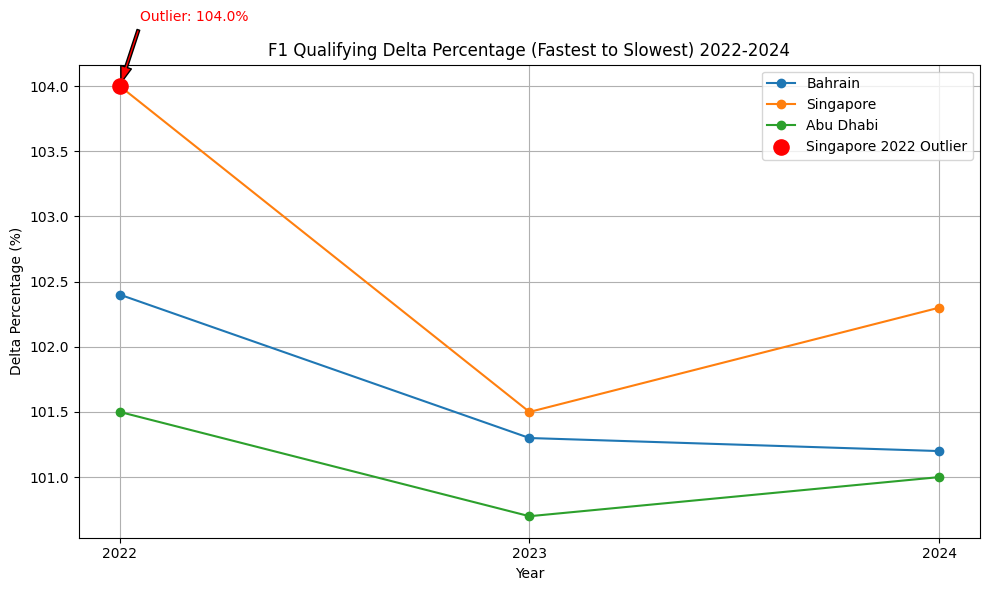

In [27]:
years = [2022, 2023, 2024]
bahrain = [BahrainQ12022Delta, BahrainQ12023Delta, BahrainQ12024Delta]
singapore = [SingaporeQ12022Delta, SingaporeQ12023Delta, SingaporeQ12024Delta]
abudhabi = [AbuDhabiQ12022Delta, AbuDhabiQ12023Delta, AbuDhabiQ12024Delta]
plt.figure(figsize=(10, 6))
plt.plot(years, bahrain, marker='o', label='Bahrain')
plt.plot(years, singapore, marker='o', label='Singapore')
plt.plot(years, abudhabi, marker='o', label='Abu Dhabi')
plt.scatter([2022], [104.0], color='red', s=120, zorder=5, label='Singapore 2022 Outlier')
plt.annotate('Outlier: 104.0%', 
             xy=(2022, 104.0), 
             xytext=(2022.05, 104.5),
             arrowprops=dict(facecolor='red', shrink=0.05, width=2, headwidth=8),
             fontsize=10,
             color='red')
plt.title('F1 Qualifying Delta Percentage (Fastest to Slowest) 2022-2024')
plt.xlabel('Year')
plt.ylabel('Delta Percentage (%)')
plt.xticks(years)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The chart above shows the laptime deltas for each track from 2022 - 2024. The general trend is such that the cars across the grid get closer together year over year. The outlier between these tracks is Singapore. This is likely due to the unpredictable nature of this track as there is extreme heat such that the tyre degredation is not necessarily equal year to year. Singapore 2022 has a particular outlier as the conditions were rainy. This creates a larger spread of laptime (around 4 seconds) which makes it so that the slowest q1 laptime is 104% of the fastest lap set in q1.

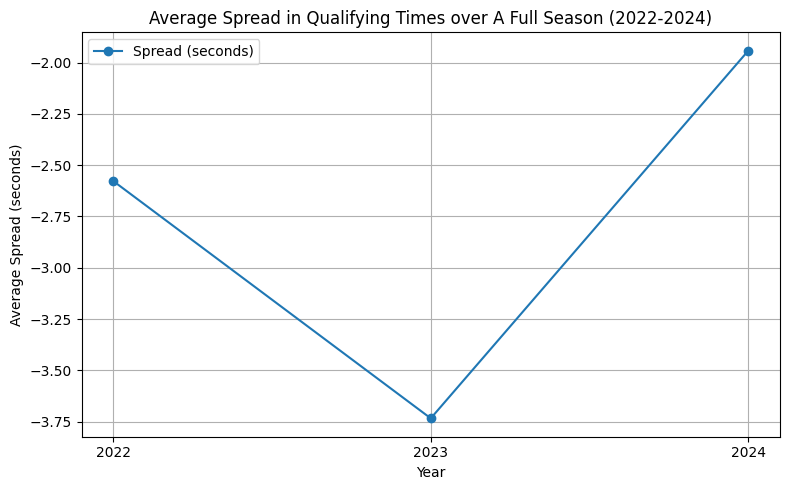

In [28]:
spreads = [yearly_spreads[2022], yearly_spreads[2023], yearly_spreads[2024]]
plt.figure(figsize = (8, 5))
plt.plot(years, spreads, marker='o', label='Spread (seconds)')
plt.title('Average Spread in Qualifying Times over A Full Season (2022-2024)')
plt.xlabel('Year')
plt.ylabel('Average Spread (seconds)')
plt.xticks(years)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The above graph shows how the grid is pretty far apart, but that in 2024 all of the teams at the back were able to develop their cars very well and close the gap to the front, making the grid much more competative from top to bottom. 

### Car Development By Team

#### Mclaren

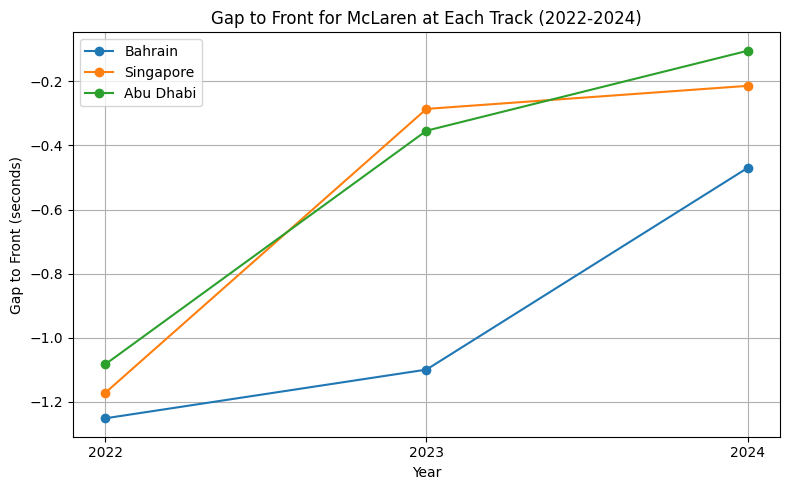

In [29]:
plt.figure(figsize=(8, 5))
for race, gaps in mclarenGaps.items():
    plt.plot(years, gaps, marker='o', label=race)
plt.title('Gap to Front for McLaren at Each Track (2022-2024)')
plt.xlabel('Year')
plt.ylabel('Gap to Front (seconds)')
plt.xticks(years)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The data above shows how Mclaren has been able to develop year over year, ultimately being much closer to the front at the end of the season in 2024, at Abu Dhabi.

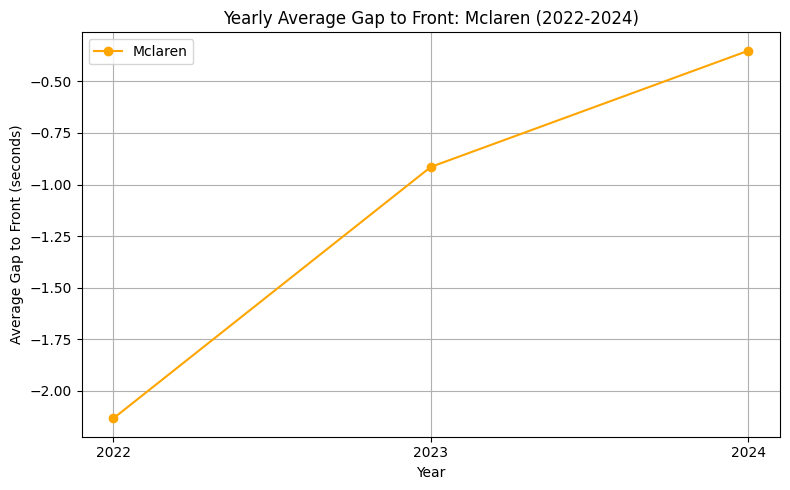

In [30]:
years = list(mclarenAvgGaps.keys())
gaps = list(mclarenAvgGaps.values())
plt.figure(figsize=(8, 5))
plt.plot(years, gaps, marker='o', linestyle='-', color='orange', label='Mclaren')
plt.title('Yearly Average Gap to Front: Mclaren (2022-2024)')
plt.xlabel('Year')
plt.ylabel('Average Gap to Front (seconds)')
plt.xticks(years)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

The trend on this graph tends to match what shows in the graph above this one. Mclaaren has been able to develop their car from somewhere in the back of the field in 2022 to the lower end of the top 4 teams in 2023, and then right at the front of the field in 2024 when they won the contructors (combined points of both cars) championship.

#### Ferrari

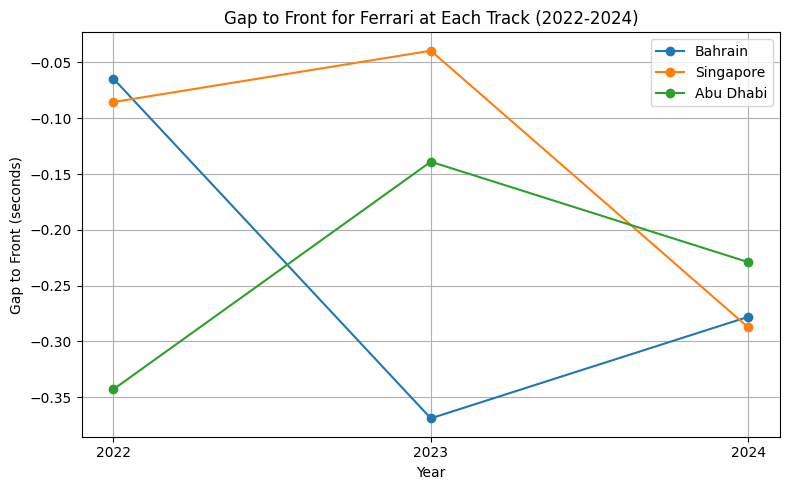

In [31]:
plt.figure(figsize=(8, 5))
for race, gaps in ferrariGaps.items():
    plt.plot(years, gaps, marker='o', label=race)
plt.title('Gap to Front for Ferrari at Each Track (2022-2024)')
plt.xlabel('Year')
plt.ylabel('Gap to Front (seconds)')
plt.xticks(years)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

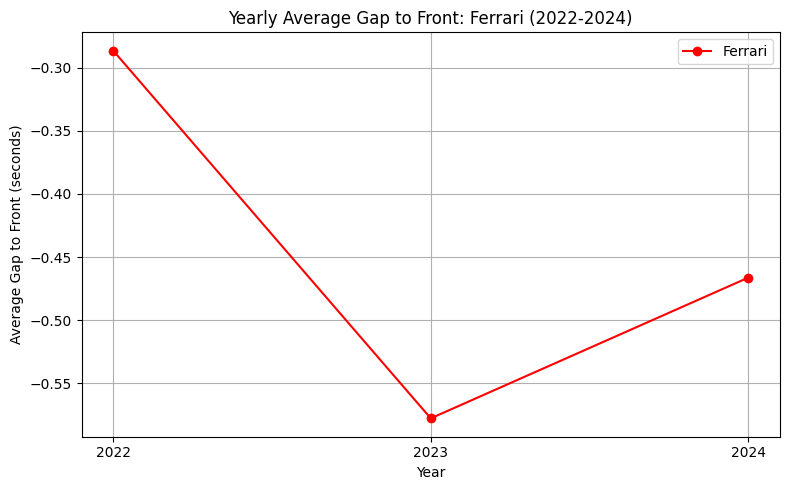

In [32]:
years = list(ferrariAvgGaps.keys())
gaps = list(ferrariAvgGaps.values())
plt.figure(figsize=(8, 5))
plt.plot(years, gaps, marker='o', linestyle='-', color='red', label='Ferrari')
plt.title('Yearly Average Gap to Front: Ferrari (2022-2024)')
plt.xlabel('Year')
plt.ylabel('Average Gap to Front (seconds)')
plt.xticks(years)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Ferrari shows an interesting case. This graph looks like they majorly regressed and then pushed a step forward to the front. I think this is partially due to the dominance of Red Bull throughout the 2023 season where they won 21/22 races and were consistently qualifying on top. So this data is partiall skewed by the development of the other teams.

#### Red Bull

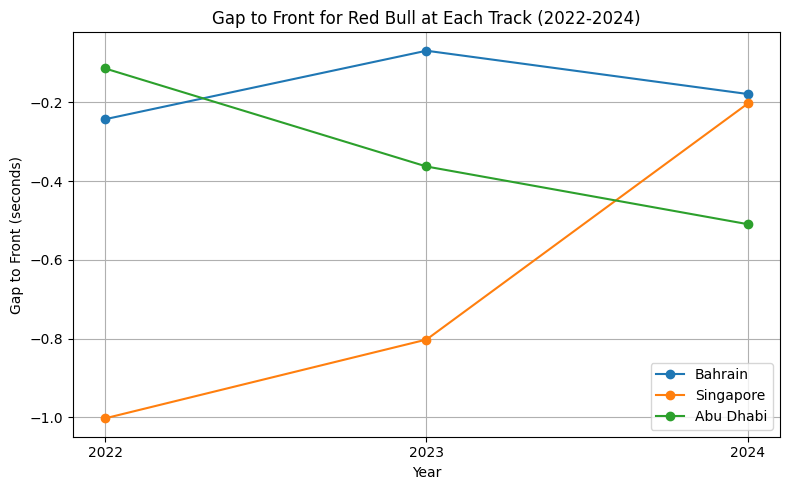

In [33]:
plt.figure(figsize=(8, 5))
for race, gaps in rbGaps.items():
    plt.plot(years, gaps, marker='o', label=race)
plt.title('Gap to Front for Red Bull at Each Track (2022-2024)')
plt.xlabel('Year')
plt.ylabel('Gap to Front (seconds)')
plt.xticks(years)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

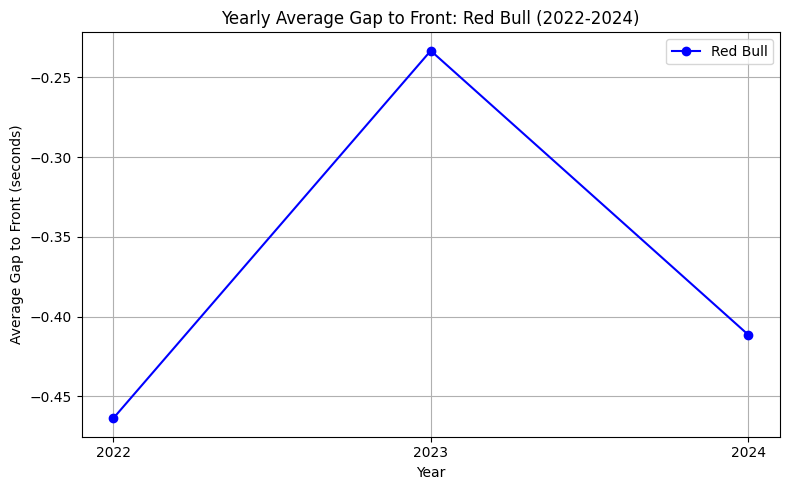

In [34]:
years = list(rbAvgGaps.keys())
gaps = list(rbAvgGaps.values())
plt.figure(figsize=(8, 5))
plt.plot(years, gaps, marker='o', linestyle='-', color='blue', label='Red Bull')
plt.title('Yearly Average Gap to Front: Red Bull (2022-2024)')
plt.xlabel('Year')
plt.ylabel('Average Gap to Front (seconds)')
plt.xticks(years)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In the two above graphs, this shows some of the weaknesses of their car (being Singapore where they look to have a dip in performance, particularly in 2022 and 2023) and especially on the second graph, how there can be some tracks where one of the drivers can be slower which brings down the car average even though they might have set the fastest time in a session.

#### Mercedes

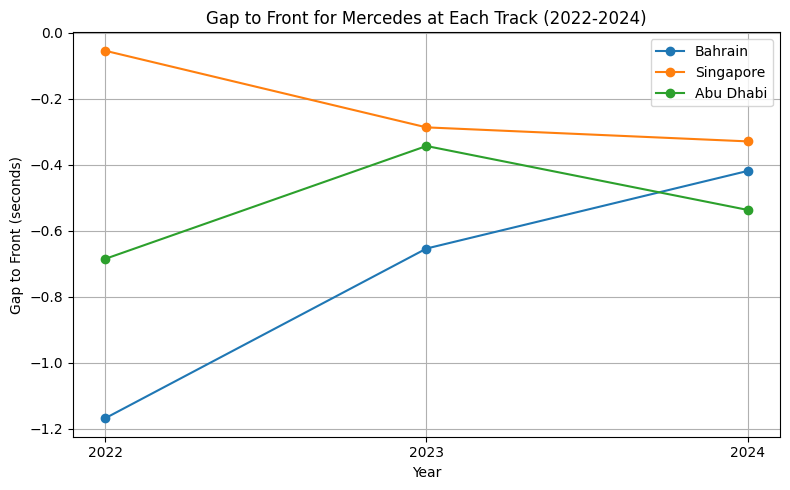

In [35]:
plt.figure(figsize=(8, 5))
for race, gaps in mercGaps.items():
    plt.plot(years, gaps, marker='o', label=race)
plt.title('Gap to Front for Mercedes at Each Track (2022-2024)')
plt.xlabel('Year')
plt.ylabel('Gap to Front (seconds)')
plt.xticks(years)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

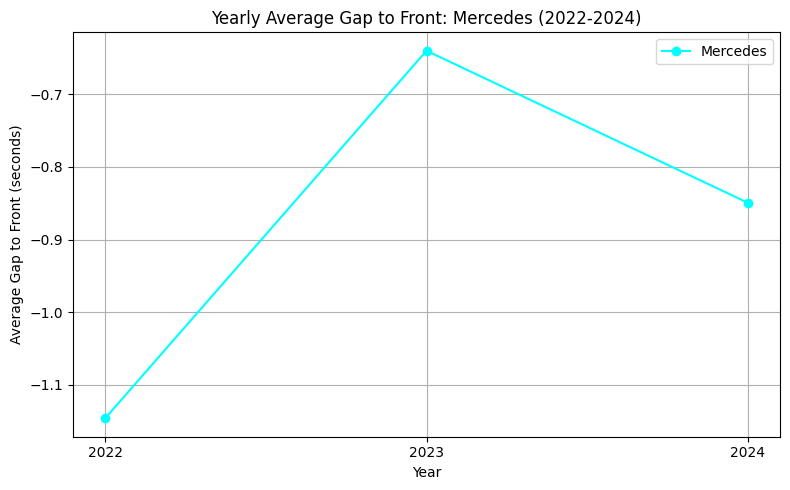

In [36]:
years = list(mercAvgGaps.keys())
gaps = list(mercAvgGaps.values())
plt.figure(figsize=(8, 5))
plt.plot(years, gaps, marker='o', linestyle='-', color='cyan', label='Mercedes')
plt.title('Yearly Average Gap to Front: Mercedes (2022-2024)')
plt.xlabel('Year')
plt.ylabel('Average Gap to Front (seconds)')
plt.xticks(years)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Mercedes seems to be in a very similar situation to Red Bull with their performance. They were a little further behind in 2022, and then they were able to keep up through 2023, and then they likely held on to their performance, but the teams at the front continued their development and were able to take a step forward which left Mercedes behind.

#### Aston Martin

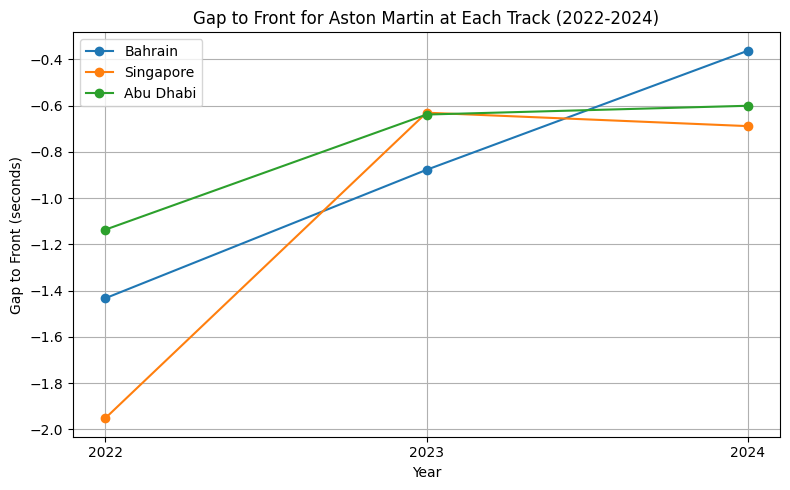

In [37]:
plt.figure(figsize=(8, 5))
for race, gaps in amGaps.items():
    plt.plot(years, gaps, marker='o', label=race)
plt.title('Gap to Front for Aston Martin at Each Track (2022-2024)')
plt.xlabel('Year')
plt.ylabel('Gap to Front (seconds)')
plt.xticks(years)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

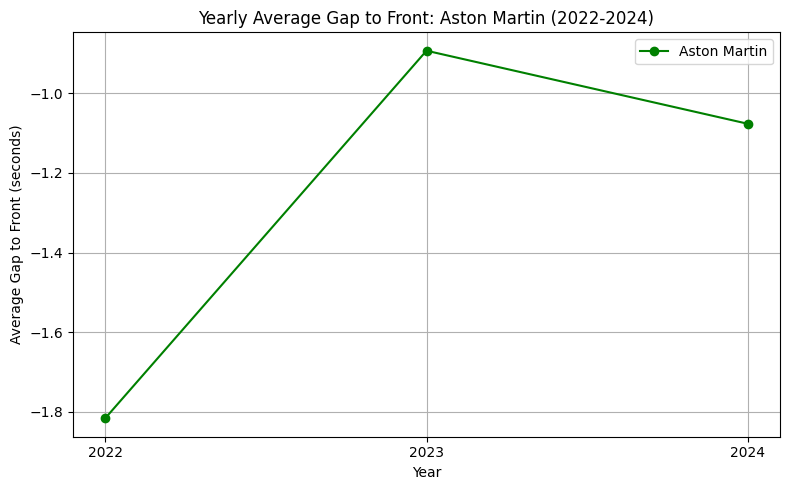

In [38]:
years = list(amAvgGaps.keys())
gaps = list(amAvgGaps.values())
plt.figure(figsize=(8, 5))
plt.plot(years, gaps, marker='o', linestyle='-', color='green', label='Aston Martin')
plt.title('Yearly Average Gap to Front: Aston Martin (2022-2024)')
plt.xlabel('Year')
plt.ylabel('Average Gap to Front (seconds)')
plt.xticks(years)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Aston Martin is a case where they came out of the blocks in 2022 incredibly slow, but then they were able to develop really well through into the 2023 season, where they were able to be competative at the start of the year, but started to regress as 2023 went on and into 2024.